# Extracting and Visualizing Tesla Stock

## 1. Import libraries

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 2. Using the yfinance Library to Extract Tesla Stock Data

Using the `yfinance` Library allow us to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Tesla and the ticker symbol is `TSLA`.

In [2]:
tesla_data =yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame.

In [3]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## 3. Information About Tesla Stock Data

`.shape` method return a tuple representing the dimensionality of the DataFrame.

In [4]:
print('Tesla Data Shape :', tesla_data.shape)

Tesla Data Shape : (3241, 7)


`.info()` method prints information about a DataFrame including the column name, dtype, etc.

In [5]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3241 non-null   datetime64[ns]
 1   Open       3241 non-null   float64       
 2   High       3241 non-null   float64       
 3   Low        3241 non-null   float64       
 4   Close      3241 non-null   float64       
 5   Adj Close  3241 non-null   float64       
 6   Volume     3241 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 177.4 KB


Check if there's any missing data.

In [6]:
tesla_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 4. Descriptive Statistics About Tesla Stock Data 

`.describe()` is used to view some basic statistical details like percentile, mean, std, etc. of a data frame.

In [7]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3.241000e+03
mean,62.081144,63.478582,60.547096,62.044212,62.044212,9.542421e+07
std,96.298022,98.513015,93.807993,96.185609,96.185609,8.154956e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.562000,9.724667,9.310000,9.570000,9.570000,4.373400e+07
50%,16.508667,16.738667,16.313999,16.515333,16.515333,7.760550e+07
75%,38.125999,39.320000,37.140667,37.970669,37.970669,1.211385e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## 5. Tesla Stock Data Visualization

Closing price generally refers to the last price at which a stock trades during a regular trading session.

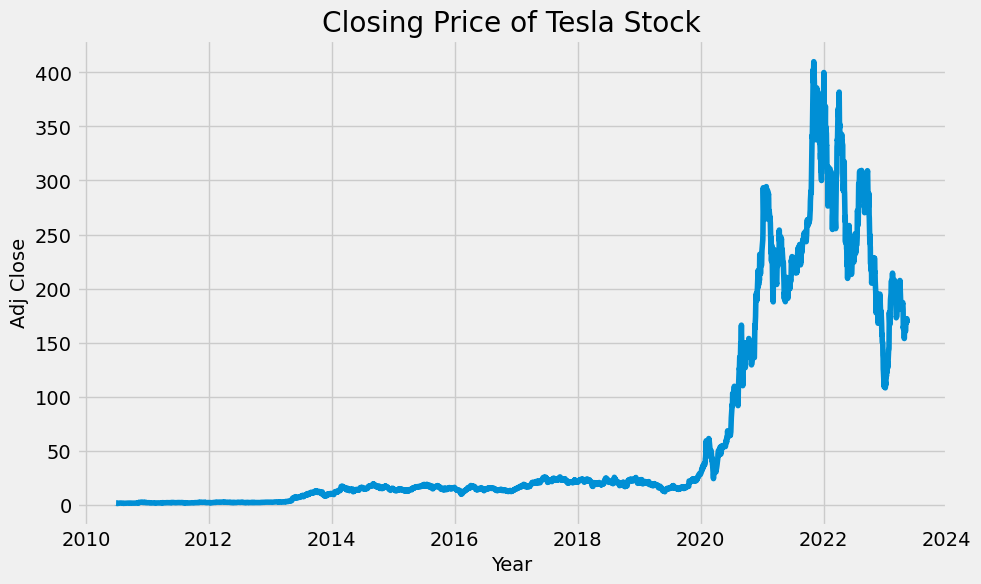

In [8]:
plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'],tesla_data['Adj Close'])
plt.title('Closing Price of Tesla Stock')
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.show()

Volume is counted as the total number of shares that are actually traded (bought and sold) during the trading day.

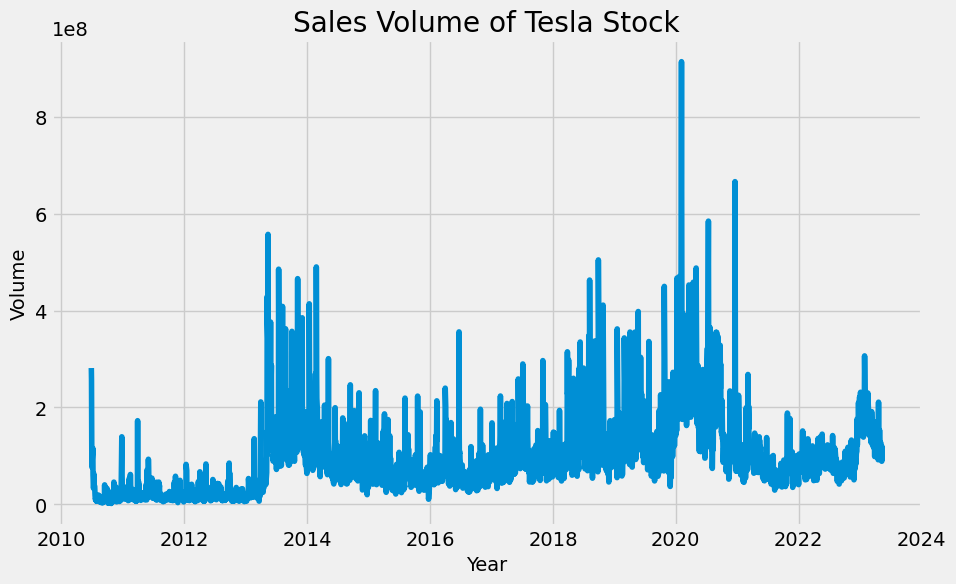

In [9]:
plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'],tesla_data['Volume'])
plt.title('Sales Volume of Tesla Stock')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

Daily return on a stock is used to measure the day to day performance of stocks, it is the price of stocks at today’s closure compared to the price of the same stock at yesterday’s closure.

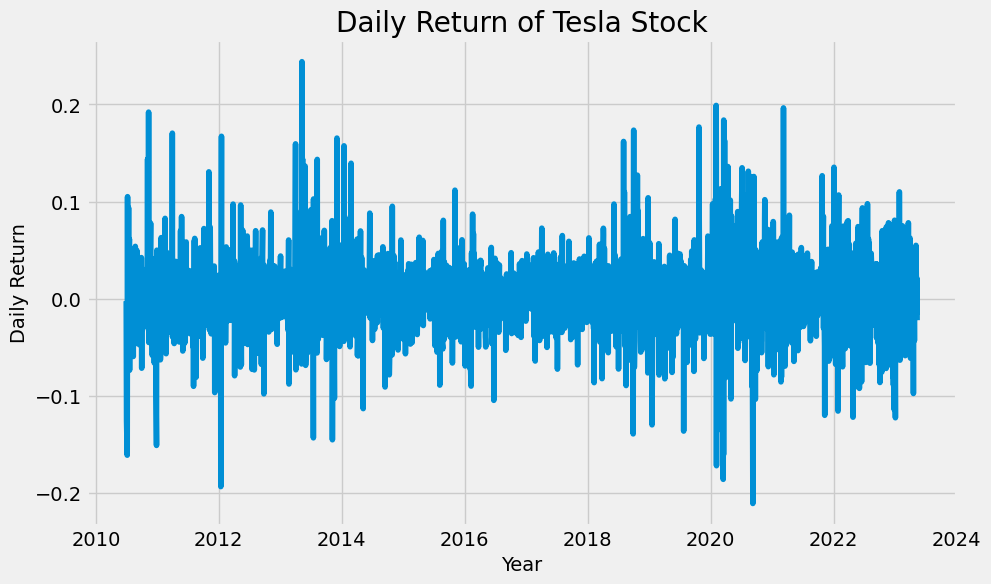

In [10]:
tesla_data['Daily Return']=tesla_data['Adj Close'].pct_change()

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'],tesla_data['Daily Return'])
plt.title('Daily Return of Tesla Stock')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.show()

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.

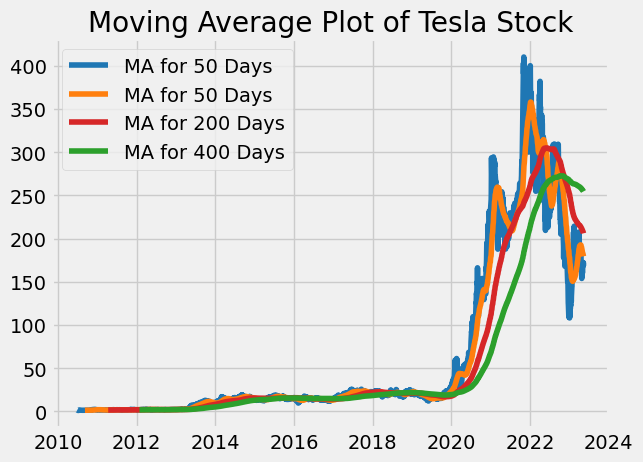

In [11]:
tesla_data['rolling1']=tesla_data['Adj Close'].rolling(window=50).mean()
tesla_data['rolling2']=tesla_data['Adj Close'].rolling(window=200).mean()
tesla_data['rolling3']=tesla_data['Adj Close'].rolling(window=400).mean()

fig, ax = plt.subplots()
ax.plot(tesla_data['Date'], tesla_data['Adj Close'], color ='tab:blue', label='MA for 50 Days')
ax.plot(tesla_data['Date'], tesla_data['rolling1'], color ='tab:orange', label='MA for 50 Days')
ax.plot(tesla_data['Date'], tesla_data['rolling2'], color ='tab:red', label='MA for 200 Days')
ax.plot(tesla_data['Date'], tesla_data['rolling3'], color ='tab:green', label='MA for 400 Days')
ax.set_title('Moving Average Plot of Tesla Stock')
ax.legend()
plt.show()

## 6. Use Webscraping to Extract Tesla Revenue Data

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm
then parse the html data using beautiful_soup.

In [12]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data=requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')
read_tesla_html=pd.read_html(str(soup))
tesla_revenue=read_tesla_html[1]
tesla_revenue.tail()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


Rename the column, remove the comma and dollar sign from the Revenue column, and change their dtypes.

In [13]:
tesla_revenue.rename(columns = {'Tesla Quarterly Revenue (Millions of US $)':'Date'}, inplace = True)
tesla_revenue.rename(columns = {'Tesla Quarterly Revenue (Millions of US $).1':'Revenue'}, inplace = True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])
tesla_revenue.tail()

C:\Users\Personal\AppData\Local\Temp\ipykernel_5084\4077541525.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$',"")


,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,NaN
52,2009-09-30,46.0
53,2009-06-30,27.0


## 7. Information About Tesla Revenue Data

`.shape` method return a tuple representing the dimensionality of the DataFrame.

In [14]:
print('Tesla Revenue Shape :', tesla_revenue.shape)

Tesla Revenue Shape : (54, 2)


`.info()` method prints information about a DataFrame including the column name, dtype, etc.

In [15]:
tesla_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     54 non-null     datetime64[ns]
 1   Revenue  53 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 992.0 bytes


Check if there's any missing data.

In [16]:
tesla_revenue.isnull().sum()

Date       0
Revenue    1
dtype: int64

Drop the missing data

In [17]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.isnull().sum()

Date       0
Revenue    0
dtype: int64

## 8. Descriptive Statistics About Tesla Revenue Data 

`.describe()` is used to view some basic statistical details like percentile, mean, std, etc. of a data frame.

In [18]:
tesla_revenue.describe()

,Revenue
count,53.000000
mean,4101.226415
std,5484.001678
min,21.000000
25%,306.000000
50%,1214.000000
75%,6303.000000
max,21454.000000


## 9. Tesla Revenue Data Visualization

Revenue is the money generated from normal business operations, calculated as the average sales price times the number of units sold.

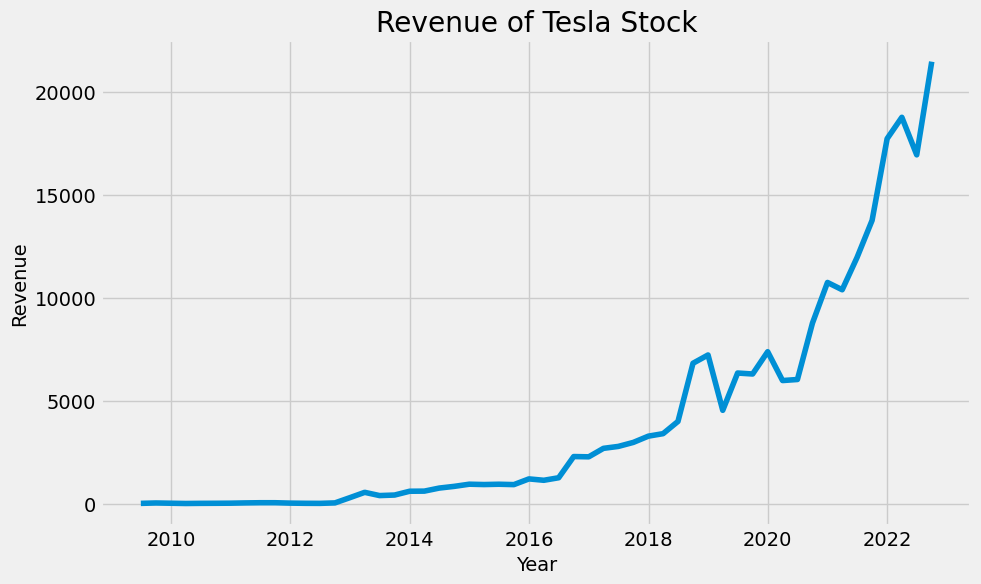

In [19]:
plt.figure(figsize=(10,6))
plt.plot(tesla_revenue['Date'],tesla_revenue['Revenue'])
plt.title('Revenue of Tesla Stock')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()